In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV data into a DataFrame
df = pd.read_csv('../Information Mart/orders_products_details/orders_products_details.csv')
df2 = pd.read_csv('../staging_2/order_status_lookup/order_status_lookup.csv')
import pandas as pd

# Inner join on 'order_status' and 'status_id'
df = pd.merge(df, df2, left_on='order_status', right_on='status_id', how='inner')

# result_df will contain only the rows where 'order_status' equals 'status_id'
df2

,status_id,status_name
0,1,Pending
1,2,Processing
2,3,Rejected
3,4,Completed


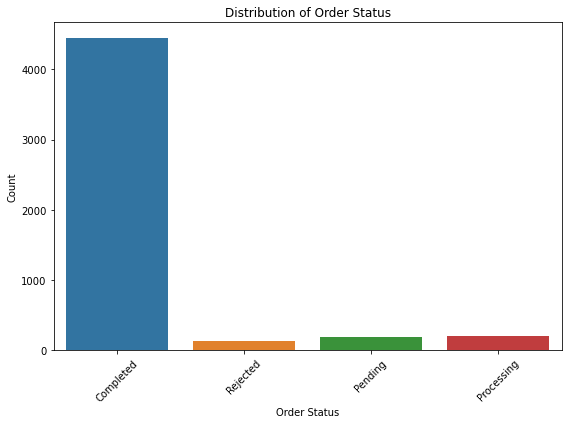

In [2]:
# Plot 1: Countplot of Order Status
plt.figure(figsize=(8, 6))
sns.countplot(x='status_name', data=df)
plt.title('Distribution of Order Status')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

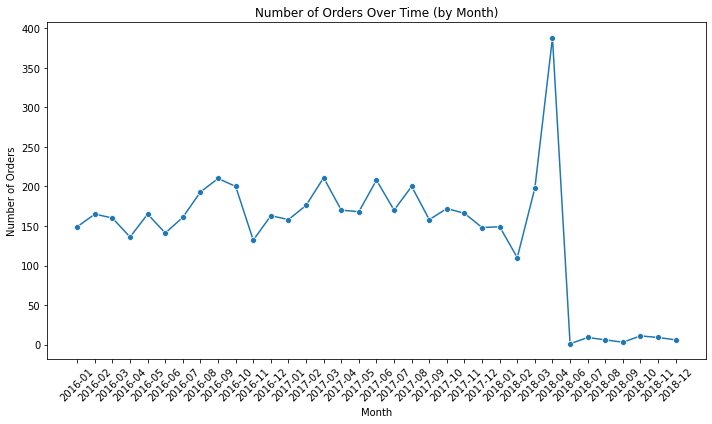

In [3]:
# Plot 2: 
# Convert 'order_date' column to datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Extract month from 'order_date' and aggregate the number of orders per month
orders_per_month = df.groupby(df['order_date'].dt.to_period('M')).size()

# Plot 4: Line plot of Order Dates over Time (by month)
plt.figure(figsize=(10, 6))
sns.lineplot(x=orders_per_month.index.astype(str), y=orders_per_month.values, marker='o')
plt.title('Number of Orders Over Time (by Month)')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()




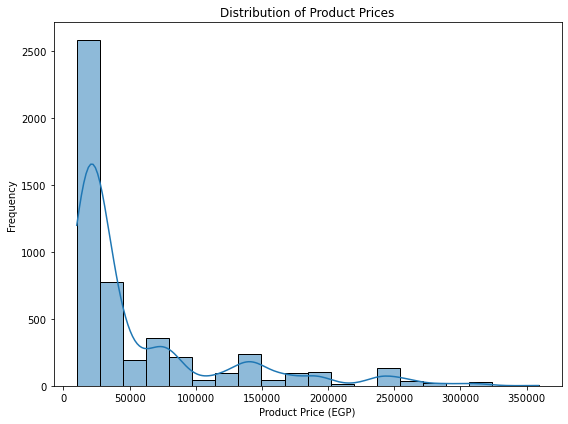

In [4]:
# Plot 3: Histogram of Product Prices
plt.figure(figsize=(8, 6))
sns.histplot(df['list_price_egp'], bins=20, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Product Price (EGP)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()